# Pneumatic Effort

In [1]:
import sys, io

In [4]:
import numpy as np

In [4]:
import matplotlib.figure

In [2]:
from IPython.core.display import Image, display, HTML


%matplotlib inline

First approximation: peak power (max flow @ max pressure):
$$ P = p f $$

In [6]:
f_num = 60 * 1e-3/60 # L/min
p_num = 35 * 98.0665 # cmH2O

In [7]:
f_num * p_num

In [8]:
f_num = 135 * 1e-3/60 # L/min
p_num = 50 * 98.0665 # cmH2O

In [9]:
f_num * p_num

Second approximation: from "worst case" waveform:
- 900 mL in 0.4s
- 50 cmH2O

$$ E = p V $$
$$ P = dE/dt $$

In [11]:
ts = np.linspace(0, 1, 100)

Make up a pressure waveform:

In [6]:
ps = (1 - np.exp(-3*np.linspace(0, 1, 100))) * 50 * 98.0665

Make up a volume waveform:

In [7]:
vs = np.linspace(0, 135, 100) * 1e-3/60

In [13]:
energies = ps * vs

In [14]:
des = (energies[1:] - energies[:-1])
dts = 1/100
powers = des/dts
powers

array([ 0.33262927,  0.97803084,  1.59453601,  2.1832948 ,  2.74541432,
        3.28196031,  3.79395862,  4.28239665,  4.74822472,  5.19235741,
        5.61567485,  6.01902395,  6.40321963,  6.76904591,  7.11725711,
        7.44857886,  7.76370919,  8.06331949,  8.3480555 ,  8.61853823,
        8.87536488,  9.1191097 ,  9.35032482,  9.56954106,  9.77726872,
        9.97399833, 10.16020137, 10.33633097, 10.5028226 , 10.66009468,
       10.80854926, 10.94857261, 11.08053578, 11.20479519, 11.32169315,
       11.43155842, 11.53470669, 11.63144104, 11.72205248, 11.80682035,
       11.88601275, 11.959887  , 12.02869003, 12.09265875, 12.15202046,
       12.20699319, 12.25778607, 12.30459964, 12.3476262 , 12.38705012,
       12.42304813, 12.45578962, 12.48543692, 12.51214558, 12.53606462,
       12.55733676, 12.57609872, 12.59248138, 12.60661007, 12.61860475,
       12.62858023, 12.63664636, 12.64290823, 12.64746637, 12.6504169 ,
       12.65185174, 12.65185873, 12.65052185, 12.64792129, 12.64

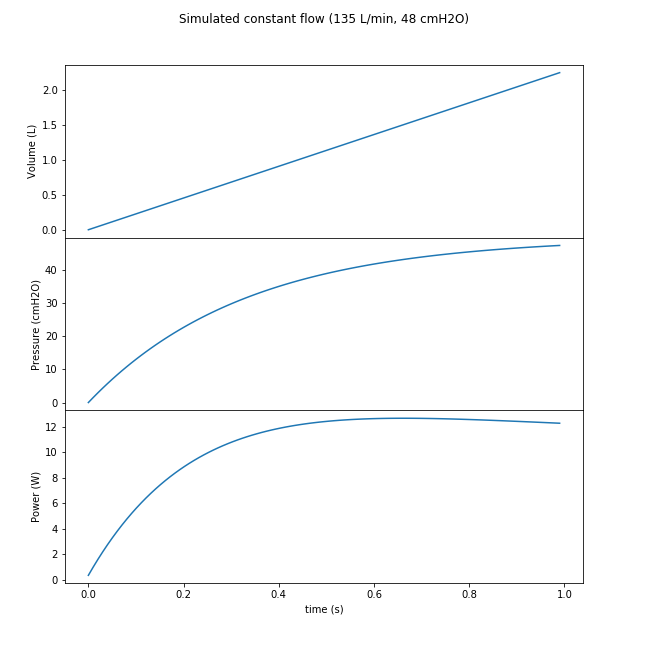

In [15]:
def fig_pf():
    subpcfg = matplotlib.figure.SubplotParams(
     left  =0.10,
     bottom=0.10,
     right =0.90,
     top   =0.90,
     wspace=0.00,
     hspace=0.00,
    )
    figure = matplotlib.figure.Figure(
     facecolor='white',
     edgecolor='white',
     subplotpars=subpcfg,
     figsize=(9,9),
    )

    axes = figure.add_subplot(3, 1, 1)
    axes.set_xlabel(("time (s)"))
    axes.set_ylabel(("Volume (L)"))
    axes.plot(ts, vs * 1e3)
    
    axes = figure.add_subplot(3, 1, 2)
    axes.set_xlabel(("time (s)"))
    axes.set_ylabel(("Pressure (cmH2O)"))
    axes.plot(ts, ps / 98.0665)

    axes = figure.add_subplot(3, 1, 3)
    axes.set_xlabel(("time (s)"))
    axes.set_ylabel(("Power (W)"))
    axes.plot(ts[:-1], powers)

    figure.suptitle(f"Simulated constant flow ({vs[-1]*1000*60:.0f} L/min, {ps[-1]/98.0665:.0f} cmH2O)")
    
    return figure

fig = fig_pf()
canvasbase = matplotlib.backend_bases.FigureCanvasBase(fig)
figure_canvas = canvasbase._get_output_canvas("png")
f = io.BytesIO()
figure_canvas.print_png(f)
display(Image(data=f.getvalue(), format="png", embed=True))